# Homework 9 Problem 2

## Luke Meiler

### Spring Frequency

Again using the [PhyPhox](https://phyphox.org/) phone app, we measured the acceleration of the phone as it moved up and down on a spring. Using this data, we are going to find the frequency of the spring. This will be accomplished by taking the Fast Fourier Transform (FFT) of the acceleration data.

Again, we start by importing some useful tools and grabbing the data from the csv the same way as last time:

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import math

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [4]:
data = np.genfromtxt(fname='LukeMeilerSpringData.txt', usecols=(0, 4), skip_header=1)
type(data)

numpy.ndarray

1:80: E501 line too long (85 > 79 characters)


In [5]:
def get_vals(data):
    """This function takes the data set generated from the
    numpy genfromtxt function of the three desired columns
    and returns a list of three lists: the times, CH4 levels,
    and uncertainties.

    Parameters:

    data: numpy.ndarry

        The set of data that you wish to rearrange into a list of its
        columns in each list.

    Returns:

    master_list: list

        A list containing a list for each column in the inputed data set
        with the elements of said column.

    """
    time_list = []
    spring_list = []
    master_list = []
    for i in data:
        time_list.append(i[0])
        spring_list.append(i[1])
    master_list.append(time_list)
    master_list.append(spring_list)
    return master_list

In [6]:
data_list = get_vals(data)
time = data_list[0]
spring = data_list[1]

### The Plot

Here we can see a nice periodicity in the phone's motion, meaning there will actually be a frequency to find.

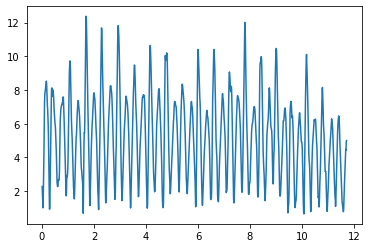

In [7]:
plt.plot(time, spring)

### The FFT

In order to find the frequency of the phone's oscillation, we will use numpy's FFT function on the acceleration list. We also use numpy's fftfreq function to find the correct frequency space for the plot. Upon inspection of the dataset, we estimate the sampling rate to be about 100 points per second. The sample spacing is then the inverse of this.

In [8]:
y = np.fft.fft(spring)
y_length = len(y)
sample_rate = 100
sample_spacing = 1/100

freq = np.fft.fftfreq(y_length, sample_spacing)

y

array([6089.27863224-3.81916720e-14j, -234.82382986-1.76190644e+02j,
       -202.66075014-1.69668865e+02j, ...,    7.62200809+1.05132072e+02j,
       -202.66075014+1.69668865e+02j, -234.82382986+1.76190644e+02j])

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


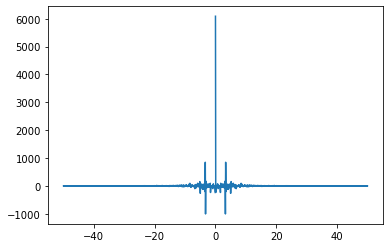

In [9]:
plt.plot(freq, y)
# plt.xlim(10, 100)
plt.show()

As we can see here, the FFT plot has a very large spike right at zero. This corresponds to the motion's non-periodic component. We are more interested at the second peak, just to the right of the largest peak. The spike to the left is just the reflection of the same peak in the negative range, and so is uninteresting. Let's take a look at this second peak more closely:

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


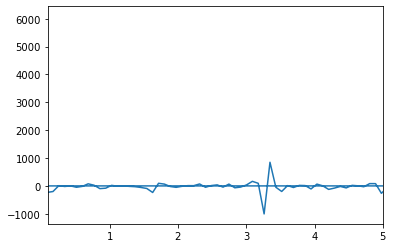

In [10]:
plt.plot(freq, y)
plt.xlim(0.1, 5)
plt.show()

It looks like there is a peak around $3.2 Hz$, which should be the frequency that we are interested in. Looking at the time series for the oscillation, this makes sense; it looks like there are about three oscillations per second. We can use another function to find out exactly what frequency this peak corresponds to. First, we have to find the list of indicies of the three highest peaks that we are interested in using the argsort function.

In [11]:
n = 3
indices = (-y).argsort()[:n]
# print(indices)


def getFreq(frequency_list, index_list):
    """ This function takes two lists: one of the set that you
    want to find the values from, and one containing the
    indices at which you want the values from the first list.

    Parameters:

    frequency_list: list

        The list that the desired values are contained in

    index_list: list

        The list containing the indices for the desired values of
        the frequency list.


    Returns:

    freq_return: list

        A list containing the values from frequency_list at the
        indices contained in index_list
    """
    freq_return = []
    for i in index_list:
        freq_return.append(frequency_list[i])
    return freq_return


frequencies = getFreq(freq, indices)
print(frequencies)

[0.0, 3.347639484978541, -3.347639484978541]


Here we see that the highest peak corresponds to $0 Hz$ as expected. The second highest peak and its reflection correspond to $3.35 Hz$. We expected a peak at around $3.2 Hz$, so this also checks out. This means that the phone was oscillating at a frequency of about $3.2 Hz$.